# 2CSSID-TP07. Sélection d'attributs

- Nom : ABCHICHE
- Prénom : SARAH

In [2]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.19.5', '1.1.5', '3.2.2')

In [ ]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Dans cette partie, on va implémenter deux fonctions de régularisation et deux fonctions de filtrage. 
La régularisation sera appliquée sur la régression logistique binaire dont le code est fourni ici.


On va  essayer d'implémenter le filtrage des attributs (ANOVA : Analysis of Variance).
Le nombre des échantillons pour chaque classe est différent. 
Pour cette raison, on va implémenter ANOVA for a CRD (COMPLETELY RANDOM DESIGN). 
On va implémenter l'algorithme expliqué dans [Richard Horsly (2012) COMPLETELY RANDOM DESIGN (CRD)](https://www.ndsu.edu/faculty/horsley/CRD.pdf). 
Pour valider l'implémentation, on va utiliser les mêmes données de la page 10.

### I.1. One way F value pour un seul attribue

pour un attribut donné ($A$), on divise l'ensemble de ses échantillons sur $N$ ensembles, où $N$ est le nombre des classes. 

$$CF = \frac{(\sum_{ij} A_{ij})^2}{\sum_j |A_j|} $$
Où $\sum_{ij} A_{ij}$ est la somme de toutes les valeurs de toutes les classes, 
$\sum_j |A_j|$ est le nombre total des échantillons (de toutes les classes)

$$ TotalSS = \sum_{ij} A_{ij}^2 - CF$$
Où $\sum_{ij} A_{ij}^2$ est les somme des carrées de toutes les valeurs

$$ TreatmentSS = \sum_j \frac{(\sum_{i} A_{ij})^2}{|A_j|} - CF$$
Où $\sum_{i} A_{ij}$ est la somme des valeurs de la classe $j$ et $|A_j|$ est le nombre des éléments dans la classe $j$

$$ ErrorSS = TotalSS - TreatmentSS $$


In [3]:
# TODO Compléter la fonction one-way ANOVA pour un attribut
def f_oneway(A): 
    # A est une liste de N listes où N est le nombre des classes
    # Ces listes n'ont pas la même taille
    nbrs = np.array([len(a) for a in A]) # nombre des échantillons de chaque classe
    sommes = np.array([np.sum(a) for a in A]) # somme des valeurs de chaque classe
    sommes_caree = np.sum([np.sum(np.array(a)**2) for a in A]) # somme des valeurs carrées de toutes les valeurs
    
    # Compléter ici
    #====================================
    CF = np.sum(sommes)**2 / np.sum(nbrs)
    TotalSS = np.sum(sommes_caree) - CF    
    TreatmentSS = np.sum(sommes**2 / nbrs) - CF
    ErrorSS = TotalSS - TreatmentSS
    #====================================
    
    MSB = TreatmentSS / (len(A) - 1) 
    MSW =  ErrorSS/(nbrs.sum() - len(A))
    return MSB/MSW


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 6.418894830659841
#---------------------------------------------------------------------

AA = [[2., 2.2, 1.8, 2.3, 1.7], [1.7, 1.9, 1.5], [2., 2.4, 2.7, 2.5, 2.4], [2.1, 2.2, 2.2, 1.9]]
# Résultat : 6.418894830659841 (voir page 11 step 6)
f_oneway(AA)

6.418894830659841

### I.2. One way F value pour tous les attribues

Ici, on va calculer ANOVA pour chaque attribut. 
Les attributs avec des grandes valeurs ANOVA sont meilleurs. 



In [9]:
# TODO compléter la fonction anova pour plusieurs attributs
def anova_f(X, Y): 
    
    C = np.unique(Y)
    F = []
    # compléter ici
    
    A = [[c[:,i] for c in [X[Y == c] for c in C]] for i in range(0,X.shape[1])]
    F = [ f_oneway(a) for a in A ]
    return np.array(F)
    


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([  6.41889483,   0.40595497, 105.2745098 ]),
#  array([  6.41889483,   0.40595497, 105.2745098 ]))
#---------------------------------------------------------------------

X_t = np.array(
    [[2. , 1. , 1. ],
     [2.2, 2. , 1. ],
     [1.8, 3. , 1. ],
     [2.3, 4. , 1. ],
     [1.7, 5. , 2. ],
     [1.7, 1. , 2. ],
     [1.9, 2. , 2. ],
     [1.5, 3. , 2. ],
     [2. , 1. , 3. ],
     [2.4, 2. , 3. ],
     [2.7, 3. , 3. ],
     [2.5, 4. , 3. ],
     [2.4, 5. , 3. ],
     [2.1, 1. , 4. ],
     [2.2, 2. , 4. ],
     [2.2, 3. , 4. ],
     [1.9, 4. , 4. ]])

Y_t = np.array(["A", "A", "A", "A", "A", "B", "B", "B", "C", "C", "C", "C", "C", "D", "D", "D", "D"])

# pour valider, on va utiliser f_classif de scikit-learn 
# https://github.com/scikit-learn/scikit-learn/blob/95d4f0841d57e8b5f6b2a570312e9d832e69debc/sklearn/feature_selection/_univariate_selection.py#L42
from sklearn.feature_selection import f_classif
f_sklearn, a = f_classif(X_t, Y_t)
# la première liste est celle de scikit-learn et la deuxième est la notre
f_notre = anova_f(X_t, Y_t)

f_sklearn, f_notre

(array([  6.41889483,   0.40595497, 105.2745098 ]),
 array([  6.41889483,   0.40595497, 105.2745098 ]))

## II. Application et analyse

On va utiliser le dataset [Diabetics prediction using logistic regression](https://www.kaggle.com/kandij/diabetes-dataset). 

In [ ]:
diabetes = pd.read_csv("data/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:, -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test = Y_diabetes[-NBR_TEST:]

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST]

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### II.1. Sélection d'attributs par filtrage (Choix ANOVA)

Nous avons extrait les F values ANOVA pour les différents attributs. 


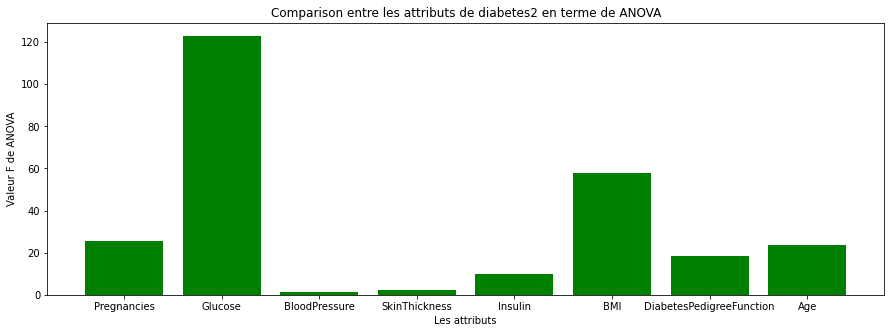

In [ ]:
from sklearn.feature_selection import f_classif
f, a = f_classif(X_train, Y_train)

labels_diabetes = list(diabetes.columns[:-1])
x_pos = range(len(f))
plt.figure(figsize=(15,5))
plt.bar(labels_diabetes, f, color="green")
plt.xlabel("Les attributs")
plt.ylabel("Valeur F de ANOVA")
plt.title("Comparison entre les attributs de diabetes2 en terme de ANOVA")

plt.xticks(x_pos, labels_diabetes)

plt.show()


**Analyser les résultats** 

- Quels sont les attributs les plus importants d'après F values ?
- Pourquoi un attribut est considéré comme important dans ANOVA (aspect mathématique et logique : les valeurs de l'attribut et de la prédiction Y) ?

**Réponse**

- Les attributs les plus importants sont : glucose, bmi, pregnancies et age
- Un attribut est considéré comme important s'il a un effet sur la sortie; la f-value est une mesure utilisé pour comparer la variance des moyennes des different groupes

### II.2. Sélection d'attributs par filtrage (Convergence et performance)

Ici, on va utiliser ANOVA pour pré-sélectionner les caractéristiques qui donnent 50% de variance. On veut comparer la convergence du modèle normal contre celui avec pré-sélection ANOVA.

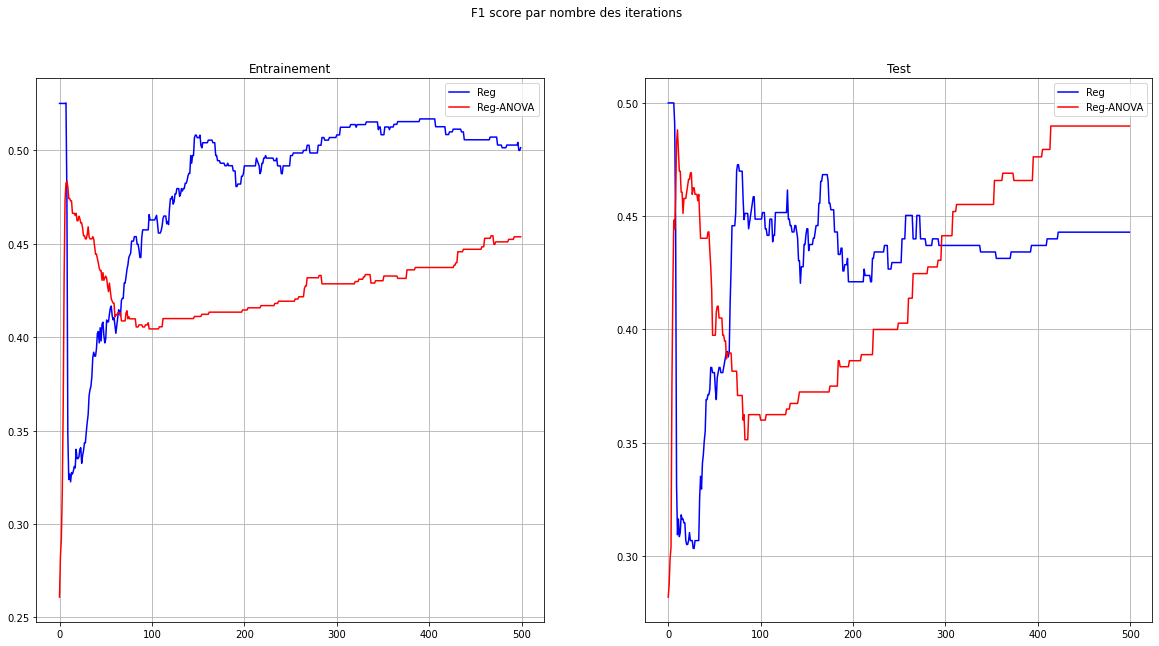

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

MAX_IT = 500


selecteur = SelectPercentile(score_func=f_classif, percentile=50)
X_train_new = selecteur.fit_transform(X_train, Y_train)
X_test_new = selecteur.transform(X_test)


reglog = LogisticRegression(penalty='none', solver="saga", max_iter=1, warm_start=True, random_state=0)
reglog.coef_ = np.array([[1.] * X_train.shape[1]])
reglog.intercept_ = np.array([1.])

reglog_anova = LogisticRegression(penalty='none', solver="saga", max_iter=1, warm_start=True, random_state=0)
reglog_anova.coef_ = np.array([[1.] * X_train_new.shape[1]])
reglog_anova.intercept_ = np.array([1.])

coefs_anova = []
coefs0_anova =[]
f1train_anova = []
f1test_anova = []

coefs = []
coefs0 =[]
f1train = []
f1test = []

for it in range(MAX_IT):
    reglog_anova.fit(X_train_new, Y_train)
    coefs_anova.append(reglog_anova.coef_.flatten().tolist())
    coefs0_anova.append(reglog_anova.intercept_[0])
    f1train_anova.append(f1_score(Y_train, reglog_anova.predict(X_train_new)))
    f1test_anova.append(f1_score(Y_test, reglog_anova.predict(X_test_new)))
    
    reglog.fit(X_train, Y_train)
    coefs.append(reglog.coef_.flatten().tolist())
    coefs0.append(reglog.intercept_[0])
    f1train.append(f1_score(Y_train, reglog.predict(X_train)))
    f1test.append(f1_score(Y_test, reglog.predict(X_test)))

coefs_anova = np.array(coefs_anova)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("F1 score par nombre des iterations")
fig.set_figwidth(20)
fig.set_figheight(10)

ax1.plot(range(MAX_IT), f1train, color="blue", label="Reg")
ax1.plot(range(MAX_IT), f1train_anova, color="red", label="Reg-ANOVA")
ax1.legend()
ax1.set_title("Entrainement")
ax1.grid()

ax2.plot(range(MAX_IT), f1test, color="blue", label="Reg")
ax2.plot(range(MAX_IT), f1test_anova, color="red", label="Reg-ANOVA")
ax2.legend()
ax2.set_title("Test")
ax2.grid()

plt.show()

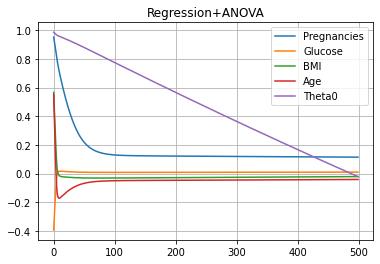

In [ ]:
labels_new = selecteur.transform(np.array(diabetes.columns[:-1]).reshape(1, len(diabetes.columns)-1)).flatten()

for i in range(len(labels_new)): 
    plt.plot(range(MAX_IT), coefs_anova[:, i], label=labels_new[i])
plt.plot(range(MAX_IT), coefs0_anova, label="Theta0")
plt.legend()
plt.title("Regression+ANOVA")
plt.grid()
plt.show()

**Analyser les résultats** 

- Pourquoi la performance de la régression sans filtrage est meilleure dans l'entrainement et pas dans le test; et l'inverse pour la régression avec filtrage ? (P.S. on ne parle pas ici du sur-apprentissage; mais des attributs : nombre et qualité)
- Est-ce que le filtrage PEUT prévenir le sur-apprentissage ? Si oui, comment ? Si non, pourquoi ?

**Réponse**

- La performance de la régression sans filtrage est meilleure dans l'entrainement car tout les attributs sont utilisés; sans perte d'information le modèle capture les relations du nuage des points à l'inverse de la régression avec filtrage où seulement certains attributs sont utilisés, ce qui implique une perte d'information et donc de une perte de performance. Par contre la régression avec filtrage est meilleure dans le test car la qualité des attributs utilisés est meilleure, fournissant des informations pertinantes, donc on aboutit à un modèle plus performant.
- La sélection d'attributs est un moyen de réduire le nombre de caractéristiques et donc de réduire la complexité de calcul du modèle. Elle est souvent très utile pour surmonter le problème de l'overfitting. Elle nous aide à déterminer le plus petit ensemble de caractéristiques nécessaires pour prédire la variable de sortie avec une grande précision. En supprimant les attributs qui n'augmente pas nécessairement la performance du modèle, on réduit la complexité de ce dernier.

### II.3. Comparaison entre les différentes approches de sélections d'attributs

Ici, on veut comparer des modèles appartenant à des différentes approches de sélection d'attributs : 
- **ANOVA** : c'est une modèle qui utilise la sélection d'attributs par filtrage. Ici, on prend les attributs qui participent de 50% de la variance (4 attributs dans notre cas)
- **L1** : c'est un modèle qui utilise la sélection d'attributs intégrée (embdded)
- **FFS (Forward Features Selection)** : c'est un modèle qui utilise la sélection d'attributs enveloppante (wrapper). Il commence par tester un seul attribut et ajouter d'autres en validant la solution à chaque fois. Ici, nous avons choisi 4 attributs. 
- **BFE (Backward Features Elimination)** : c'est un modèle qui utilise la sélection d'attributs enveloppante (wrapper). Il commence par tester tous les attributs et éliminer d'autres en validant la solution à chaque fois. Ici, nous avons choisi 4 attributs. 

On veut tester les modèles par rapport à celui sans sélection d'attributs en se basant sur les critères suivants :
- **F1 entrainement** : ici on veut répondre à la question "combien un modèle peut-il converger vers sa solution ?"
- **F1 test** : ici on veut répondre à la question "combien un modèle peut-il généraliser ?"
- **Nombre des itérations** : ici on veut répondre à la question "combien faut-il d'itérations pour qu'un modèle converge ?"
- **Temps pré-entrainement** : ici on veut répondre à la question "combien de temps faut-il pour préparer les attributs avant l'entrainement ?"
- **Temps entrainement** : ici on veut répondre à la question "combien de temps faut-il pour l'entrainement ?"

*P.S. L'exécution prend un peu de temps*


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
import timeit

CMAX_ITER = 5000
creglog = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
creglog_l1 = LogisticRegression(penalty='l1', solver="saga", max_iter=CMAX_ITER)
creglog_anova = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)

temps = {}
temps_p = {}

temps_debut = timeit.default_timer()
creglog.fit(X_train, Y_train)
temps["reg"] = timeit.default_timer() - temps_debut


temps_debut = timeit.default_timer()
creglog_l1.fit(X_train, Y_train)
temps["l1"] = timeit.default_timer() - temps_debut

temps_debut = timeit.default_timer()
selecteur_anova = SelectPercentile(score_func=f_classif, percentile=50)
X_train_anova= selecteur.fit_transform(X_train, Y_train)
temps_p["anova"] = timeit.default_timer() - temps_debut
X_test_anova = selecteur.transform(X_test)
temps_debut = timeit.default_timer()
creglog_anova.fit(X_train_anova, Y_train)
temps["anova"] = timeit.default_timer() - temps_debut

creglog_ffs = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
temps_debut = timeit.default_timer()
selecteur_ffs = SequentialFeatureSelector(creglog_ffs, n_features_to_select=4, direction="forward")
X_train_ffs = selecteur_ffs.fit_transform(X_train, Y_train)
temps_p["ffs"] = timeit.default_timer() - temps_debut
X_test_ffs = selecteur_ffs.transform(X_test)
temps_debut = timeit.default_timer()
creglog_ffs.fit(X_train_ffs, Y_train)
temps["ffs"] = timeit.default_timer() - temps_debut

creglog_bfe = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
temps_debut = timeit.default_timer()
selecteur_bfe = SequentialFeatureSelector(creglog_bfe, n_features_to_select=4, direction="backward")
X_train_bfe = selecteur_bfe.fit_transform(X_train, Y_train)
temps_p["bfe"] = timeit.default_timer() - temps_debut
X_test_bfe = selecteur_bfe.transform(X_test)
temps_debut = timeit.default_timer()
creglog_bfe.fit(X_train_bfe, Y_train)
temps["bfe"] = timeit.default_timer() - temps_debut


pd.DataFrame({
    "Criteres" : ["F1 Entrainement", "F1 Test", "Nombre des itérations", "temps pré-entrainement", "temps entrainement"],
    "Reg" : [f1_score(Y_train, creglog.predict(X_train)), 
             f1_score(Y_test, creglog.predict(X_test)),
             creglog.n_iter_, 0, temps["reg"]],
    "Reg+L1" : [f1_score(Y_train, creglog_l1.predict(X_train)), 
                f1_score(Y_test, creglog_l1.predict(X_test)), 
                creglog_l1.n_iter_, 0, temps["l1"]],
    "ANOVA+Reg" : [f1_score(Y_train, creglog_anova.predict(X_train_anova)), 
                f1_score(Y_test, creglog_anova.predict(X_test_anova)), 
                creglog_anova.n_iter_, temps_p["anova"], temps["anova"]],
    "FFS" : [f1_score(Y_train, creglog_ffs.predict(X_train_ffs)), 
                f1_score(Y_test, creglog_ffs.predict(X_test_ffs)), 
                creglog_ffs.n_iter_, temps_p["ffs"], temps["ffs"]],
    "BFE" : [f1_score(Y_train, creglog_bfe.predict(X_train_bfe)), 
                f1_score(Y_test, creglog_bfe.predict(X_test_bfe)), 
                creglog_bfe.n_iter_, temps_p["bfe"], temps["bfe"]],
})

,Criteres,Reg,Reg+L1,ANOVA+Reg,FFS,BFE
0,F1 Entrainement,0.465574,0.465574,0.381295,0.567568,0.585526
1,F1 Test,0.380165,0.380165,0.37931,0.564516,0.539683
2,Nombre des itérations,[1406],[1404],[167],[5000],[5000]
3,temps pré-entrainement,0,0,0.001401,15.230673,26.33361
4,temps entrainement,0.136229,0.157354,0.011052,0.332947,0.292366


**Analyser les résultats** 

- Pourquoi la sélection d'attributs envelopante prend plus de temps d'entrainement pourtant elle utilise moins d'attributs ? (en se basant sur les résultats)
- Pourquoi la régression avec L1 prend plus de temps d'entrainement que la régression normale pourtant elle prend moins d'itérations ?
- Pourquoi la sélection d'attributs enveloppante donne des performances mieux que celle par filtrage pourtant cette dernière sélectionne les meilleurs attributs en terme de corrélation ? (Dans notre cas, c'est le même nombre d'attributs = 4)
- Si vous avez un dataset avec plusieurs attributs et une quantité énorme d'échantillons, proposer une solution avec moins de temps de pré-entrainement+entrainement et plus de performance (Par rapport à la solution sans sélection d'attributs) en se basant sur les résultats de cette expérimentation.

**Réponse**

- La sélection d'attributs envelopante prend plus de temps car il suit une approche de recherche exhaustive en évaluant toutes les combinaisons possibles de caractéristiques par rapport au critère d’évaluation.
- La régression avec L1 prend plus de temps d'entrainement à cause du calcul du terme de régularisation
- La sélection d'attributs enveloppante donne des performances mieux que celle par filtrage car elle choisit les attributs qui offrent la meilleure performance. Ces attributs peuvent ne pas etre les meilleurs en terme de corrélation
- Sachant qu'avoir une quantité énorme de données améliore presque tout le temps les performance du modèle. Je propose l'utilisation de l'anova avec regréssion. En effet, c'est le modèle le moins couteux en temps d'après l'experementation précédante. Pour ce qui est de la performance, avec un grand dataset, on peut obtenir une score proche de celui des modèles plus performant comme le FFS, ie le modèle a beaucoup de chance pour converger vers la solution optimale